# Identifying Skin Lesions using Convolutional Neural Network


**Problem Statement:** <br>
 Train a Neural Network to identify different skin lesions with the given subset of the HAM10000 dataset.


## Human Against Machine 10000 (HAM10000) Study

HAM10000 is a set of 10015 dermatoscopic images which comprises of different pigmented skin lesion. A subset of the HAM10000 dataset is provided to train a neural network to identify the skin lesions. The training and the test set has 997 images, 496 images of pigmented skin lesion respectively. These images belong to seven different pigment skin lesion categories, and they are as follows,

1. Actinic keratoses and intraepithelial carcinoma / Bowen's disease - akiec
2. basal cell carcinoma - bcc
3. benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses) - bkl
4. dermatofibroma -df
5. melanoma - mel
6. melanocytic nevi - nv 
7. vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage) - vasc


Libraries used for the assignment is attached below:
1. cv2 - Image processing
2. json - To read the labels
3. matplotlib - To visualize graphs
4. sklearn, tensorflow and keras  -  Convolutonal Neural Networks
5. json -  To read given labels
6. glob -To read all the images in the directory

Tensorflow 2.4
<br>Python 3.8
<br>CUDA Toolkit 11.0
<br>CUDNN 8

In [1]:
import cv2                
import numpy as np             
import glob    
import json      
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import load_model
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

## Data Visualization

The Lables that needs to be classified: ['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
The training set comprises of:
Actinic Keratoses and IntraEpithelial Carcinoma (akiec) - 30 images
Basal Cell Carcinoma (bcc) - 43 images
VASCular lesions (vasc) - 97 images
DermatoFibroma (df) - 9 images
MELanoma (mel) - 82 images
melanocytic NeVi (nv) - 723 images
VASCular lesions (vasc) - 13 images


Text(0, 0.5, 'Frequency of Skin Lesions')

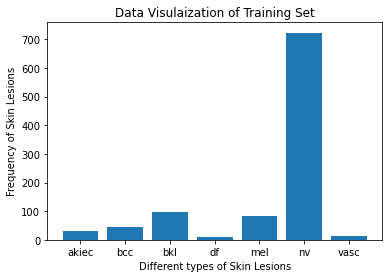

In [12]:
with open('train_labels.json') as f:
    data = json.load(f)        
data = list(data.items())
labels = np.array(data)
y = labels[:,1]
labels_unique = np.unique(y, axis=0)  
print("The Lables that needs to be classified:",labels_unique)
with open('train_labels.json') as f:
    data = json.load(f)        
data = list(data.items())
labels = np.array(data)
y = labels[:,1]
labels, counts = np.unique(y,return_counts=True) 
ticks = range(len(counts))

print("The training set comprises of:")
for i in range(len(counts)):
    if labels[i] == 'bcc':
        print("Basal Cell Carcinoma (bcc) -",counts[i],"images")
    elif labels[i] == 'akiec':
        print("Actinic Keratoses and IntraEpithelial Carcinoma (akiec) -",counts[i],"images")
    elif labels[i] == 'df':
        print("DermatoFibroma (df) -",counts[i],"images")
    elif labels[i] == 'mel':
        print("MELanoma (mel) -",counts[i],"images")
    elif labels[i] == 'nv':
        print("melanocytic NeVi (nv) -",counts[i],"images")
    else:
        print("VASCular lesions (vasc) -",counts[i],"images")
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)
plt.title('Data Visulaization of Training Set')
plt.xlabel('Different types of Skin Lesions')
plt.ylabel('Frequency of Skin Lesions')


The following inference can be drawn from the data analysis of the train set.
1. There are seven unique labels that needs to be classified. 
2. The distribution of data among the seven categories is unbalanced.
3. It is clearly visible that the label nv comprises 3/4th of the dataset. 
4. There is less data in the categories df and vasc.
5. It is a possiblity that the melanocytic Nevi is the most commonly occuring skin disorder in the humans or it can be also be due to the fact that it is easily detectable skin disorder. Hence, it could be possible reason for data abundance in this particular class.
6. A contrast reasoning can be applied for the data class df, vasc for its low number.

**Effect of unbalnced data on the Neural network model:**
<br>The equal number of data in all the classes is required for training the neural network to perform multi-label classification. However, if the above data is to be used to train a neural network model, the model will fail to classify the labels df,nv especially as it has less data. 

Methods to overcome the unbalanced data:
1. Undersampling -  The data is reduced from the class that has more data in this method. This method makes the model more sensitive to the class that has less data. Eventhough, it helps in improving the multi-class classification accuracy but there is loss of valubale data in the majority class. 
2. Oversampling - The data is generated for the classes that has low data. It makes the training dataset more balanced. However, the main problem with this method is that it can lead to overfitting the training set. 
 
In this assignment, the data is generated to balance the training set. Measures will be taken to prevent the overfitting by using dropouts in the neural network model. 


## Data Preparation - Data Sorting by Folder
The training data is mixed with images of different class. The below code will arrange the images to the corresponding labels in the Data Analysis folder.  

In [ ]:
images = []
image_paths = glob.glob( 'train/*.jpg' )
i=0
k1=k2=k3=k4=k5=k6=k7=0
for imagefile in image_paths:
    image = cv2.imread(imagefile)
    if y[i] == 'bcc':
        loc = 'Data_Analysis/bcc/' + str(k1) + '.jpg'
        cv2.imwrite(loc,image)
        k1 = k1 + 1
    elif y[i] == 'akiec':
        loc = 'Data_Analysis/akiec/' + str(k2) + '.jpg'
        cv2.imwrite(loc,image)
        k2 = k2 + 1
    elif y[i] == 'df':
        loc = 'Data_Analysis/df/' + str(k3) + '.jpg'
        cv2.imwrite(loc,image)
        k3 = k3 + 1
    elif y[i] == 'mel':
        loc = 'Data_Analysis/mel/' + str(k4) + '.jpg'
        cv2.imwrite(loc,image)
        k4 = k4 + 1
    elif y[i] == 'nv':
        loc = 'Data_Analysis/nv/' + str(k5) + '.jpg'
        cv2.imwrite(loc,image)
        k5 = k5 + 1
    elif y[i] == 'bkl':
        loc = 'Data_Analysis/bkl/' + str(k6) + '.jpg'
        cv2.imwrite(loc,image)
        k6 = k6 + 1
    else:
        loc = 'Data_Analysis/vasc/' + str(k7) + '.jpg'
        cv2.imwrite(loc,image)
        k7 = k7 + 1
    i = i+1    

## Data Augmentation
 ImageDataGenerator can generate batches of tensor image data. It can modify the original image by
 1. rotation_range - How much image can be rotataed
 2. shift in the width - 0.05 $\times$ width of the image - 0.05$\times$ 600 - 30px max shift allowed 
 3. shift in the height - 0.05$\times$ height of the image - 0.05$\times$ 450 - 22px max shift allowed
 4. sheer was not used - shape of moles can cahnge by shear transformation
 5. rescale - 1/255 - (0-1) range for LR
 6. zoom range - 0.1 Random zooming in the image
 7. horizontal_flip - Randomly flipping half of the images horizontally 
 8. fill_mode - Fills the newly created pixel
 
and can generate a new image. Using this method, many combinations of single image in all the classes were generated. 

In [ ]:
datagen = ImageDataGenerator(rotation_range=10, 
                               width_shift_range=0.05, 
                               height_shift_range=0.05, 
                               rescale=1/255,  
                               zoom_range=0.1, 
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')
CATEGORIES = ["akiec", "bcc", "bkl", "df", "mel", "nv", "vasc"]
label = np.zeros((1,7))
for category in CATEGORIES:
    image_paths = glob.glob( 'Data_Analysis/'+category+'/*.jpg' )  
    for imagefile in image_paths:
        image = cv2.imread(imagefile)
        x = np.asarray(image)
        x = x.reshape((1,) + x.shape)  
        i = 0
        for batch in datagen.flow(x, batch_size=1,save_to_dir='Data_Analysis/'+category, save_prefix='aug', save_format='jpg'):
            if category=='akiec' and i > 25:
                break 
            elif category=='bcc' and i > 15:
                break 
            elif category=='bkl' and i > 6:
                break 
            elif category=='df' and i > 85:
                break 
            elif category=='mel' and i > 7:
                break 
            elif category=='vasc' and i >55:
                break 
            elif category=='nv':
                break
            else:
                i += 1

## Training and Validation data
Due to computation complexity, the image data is reduced to 128$\times$128 pixels. By doing so, the shape of the skin lesion may look different in the training samples. 

In [ ]:
images = []
y = []
CATEGORIES = ["akiec", "bcc", "bkl", "df", "mel", "nv", "vasc"]
label = np.zeros((1,7))
for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    label[0,class_num] = 1
    image_paths = glob.glob( 'Data_Analysis/'+category+ '/*.jpg' )
    for imagefile in image_paths:
        img  = cv2.imread(imagefile)
        img = cv2.resize(img,(128,128), interpolation = cv2.INTER_LINEAR)
        h,w,d = img.shape
        img = img/255 # Convert to 0-1 range
        images.append(img)
        y.append(label)
    label = np.zeros((1,7))
    
x = np.array(images)
x1=x.reshape(-1,h,w,d) 
y = np.array(y)
y=y.reshape(len(y),7) 
train_img,test_img,train_label,test_label = train_test_split(x,y,test_size=0.25,random_state=42)

# Convolutional Neural Netwroks
A convolutional neural network (CNN) can recognize patterns such as edges (vertical/horizontal), shapes, colours, and textures. Generally, a skin lesions are determined by its size, irregular edges, color, itchiness, location at where it occurs at the body. Drawbacks of using the given set and CNN 
1. Due to decraese in the resolution of training images, it is susceptible to change in the shape of the skin leasion.  
2. Size of the mole cannot be determined by the CNN. The 3rd dimesnion data is missing.
3. Data of location of the mole in the body is also missing.

Hence, using cnn to classify the given label is challenging and will not be 100% accurate.


It is known that when the images go through more layers, the model learns sophisticated patterns. I was restrained from adding more layers to the network given the configuration of my laptop. Dropouts were added to decrease the overfitting of the model.

In [ ]:
input_shape=(h,w,d)

model=Sequential()


model.add(Conv2D(64,(2,2),input_shape=input_shape,activation='relu'))
model.add(Conv2D(64,(2,2),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(128,(2,2),input_shape=input_shape,activation='relu'))
model.add(Conv2D(128,(2,2),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(256,(2,2),input_shape=input_shape,activation='relu'))
model.add(Conv2D(256,(2,2),input_shape=input_shape,activation='relu'))
model.add(Conv2D(256,(2,2),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512,(2,2),input_shape=input_shape,activation='relu'))
model.add(Conv2D(512,(2,2),input_shape=input_shape,activation='relu'))
model.add(Conv2D(512,(2,2),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',Recall()])


model.summary()

## Training the Model

The batch size is 25 becomes of insuffcient memory. Different epochs 50,78 and 500 were taken.

In [ ]:
hist = model.fit(train_img,train_label,epochs=500,batch_size=25,validation_data=(test_img, test_label))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
model.save( '3_128_128_250.h5')

There are three model trained 
1. 2_128_128.h5 - Ran 50 epochs
2. 3_128_128_78.h5 - Ran 78 epochs
3. 4_128_128_500.h5 - Ran 500 epochs
**As the labels of the test data was not given, please try all the models.** The training loss of the 3_128_128_78.h5 and 4_128_128_500.h5 is plotted below.

### 3_128_128_78.h5 Model Loss Curve
<img src="Figure_1.png">

### 4_128_128_500.h5  Model Loss Curve
<img src="Figure_3.png">




## Inference
 Convert the test images to 128$\times$128 resolution for inference.
 

In [ ]:
test_labels = []
model = load_model('2_128_128.h5')
image_paths = glob.glob( 'test/*.jpg' )
for imagefile in image_paths:
    img  = cv2.imread(imagefile)
    img = cv2.resize(img,(128,128), interpolation = cv2.INTER_LINEAR)
    img = img/255
    np_final = np.expand_dims(img,axis=0)
    pred = model.predict(np_final)
    index = np.argmax(pred[0,:])
    if index == 0:
        labs = "akiec"
    elif index == 1:
        labs = "bcc"
    elif index == 2:
        labs = "bkl"
    elif index == 3:
        labs = "df"
    elif index == 4:
        labs = "mel"
    elif index == 5:
        labs = "nv"
    else:
        labs = "vasc"
    test_labels.append(labs)

## Future Work - How you would solve this problem if there was more time and computational power?

More Time:
1. Underfitting - Try training the model by underfitting the data. It is believed that it improves the classification accuracy.
2. Do a literature survey if there are other ways to tackle the unbalanced dataset problem.
3. As mentioned  before, a comphrehensive study of which architecture to use should be done.
4. Data cleaning - Duplicate images were not checked. 
5. **A detailed study of all skin disorders and its characteristics.**
6. Tuning the parameters. 

More Computation Power:
1. Training with deeper neural networks. When the network is deeper, more is the parameter to be trained and the more computation power required.
2. Training the neural network with the full image resolution preserving its artifacts.